# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [75]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [76]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Average 4th Grade Math Score

How many years of data are logged in our dataset? 

In [77]:
df["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [78]:
# Because Michigan always beats Ohio, but this is an outlier
michigan = df[df["STATE"] == "MICHIGAN"]
ohio = df[df["STATE"] == "OHIO"]

print(f"Michigan: {michigan['AVG_MATH_4_SCORE'].mean()}, Ohio: {ohio['AVG_MATH_4_SCORE'].mean()}")

Michigan: 234.36363636363637, Ohio: 239.45454545454547


Find the average for your outcome score across all states in 2019

In [79]:
y_19 = df[df["YEAR"] == 2019]
y_19["AVG_MATH_4_SCORE"].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [80]:
states = df.groupby("STATE")
states["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [81]:
df["SUPPORT_EXPENDITURE_PER_STUDENT"] = df["SUPPORT_SERVICES_EXPENDITURE"] / df["ENROLL_KINDER"]
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL_KINDER"]

Feature engineering justification: I realized that money definitely affects the way that a student performs. I wanted to look at both Support Services and Instructional Expenditures. Since I am measuring 4th grade students, I wanted to measure their expenditure leading through kindergarten to gauge how much of an impact money has had on their education so far.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average 4th Grade Math Score')

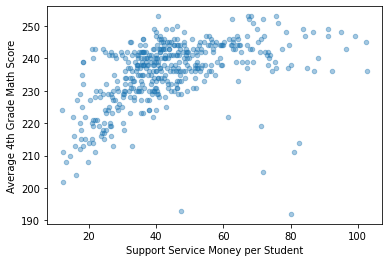

In [82]:
df.plot.scatter(x="SUPPORT_EXPENDITURE_PER_STUDENT", y="AVG_MATH_4_SCORE", alpha=0.4)
plt.xlabel("Support Service Money per Student")
plt.ylabel("Average 4th Grade Math Score")

A comparison of the money spent of Support Services per Student in their Kindergarten times to their Average Reading Score in 4th grade.

**Visualization 2**

Text(0, 0.5, 'Average 4th Grade Math Score')

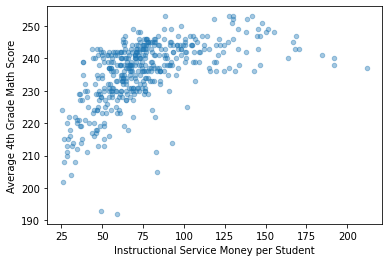

In [83]:
df.plot.scatter(x="INSTRUCTION_EXPENDITURE_PER_STUDENT", y="AVG_MATH_4_SCORE", alpha=0.4)
plt.xlabel("Instructional Service Money per Student")
plt.ylabel("Average 4th Grade Math Score")

A comparison of the money spent of Instructional Services per Student in their Kindergarten times to their Average Reading Score in 4th grade.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = df[["ENROLL_4", "SUPPORT_EXPENDITURE_PER_STUDENT", "INSTRUCTION_EXPENDITURE_PER_STUDENT"]].dropna()
y = df.loc[X.index]["AVG_MATH_4_SCORE"].dropna()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.4, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [113]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [114]:
# create your model here
model = LinearRegression()

In [115]:
model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [117]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5

223.7080479259441
[-2.77023426e-06 -1.27508905e-01  2.39879642e-01]
0.33001087470446167


8.048305788374119

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

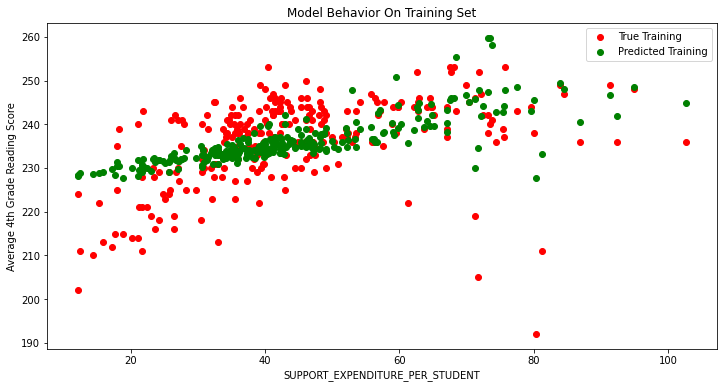

In [121]:
col_name = 'SUPPORT_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 4th Grade Math Scores')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

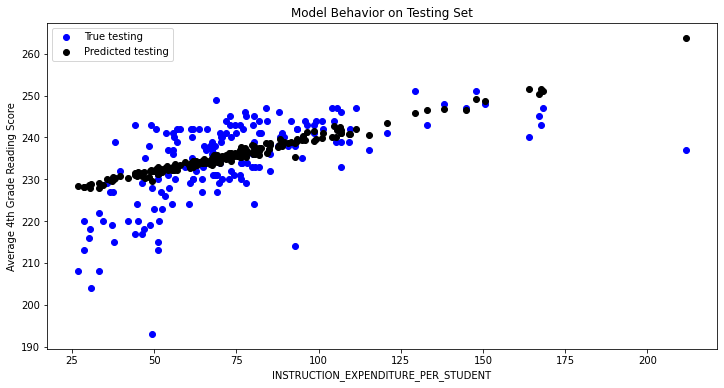

In [122]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 4th Grade Math Scores')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

With this Machine Learning Model, I wanted to see if an AI could accurately predict how well a student would perform given the amount of Instructional and Support Service Expenditures they received. After doing some data analytics, I was able to see that both Expenditures (from Kindergarten) at all levels had lots of random impact on a 4th grade student's Math scores. My model's accuracy was 33%, an extremely inaccurate model that proves that money doesn't directly correlate with performance (in Math). Based off the results of the model as well as the graphs, money may help to slightly improve a student's Math performance, but only has a minimal impact in their Math scores. Better comparisons would correlate how well 8th grade student's performed in Math or how well 4th grade student's performed in Reading to show a more direct comparison. Surprisingly, when comparing Expenditures to Reading Scores in 4th graders, there was a much more direct correlation.